In [1766]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [1767]:
def mape_score(y_test, pred):
    y_test, pred = np.array(y_test), np.array(pred)
    mape = np.mean(np.abs((y_test - pred) / y_test)) * 100
    return mape

In [1768]:
def metrics(test, pred):
    d= {}
    mse = mean_squared_error(test, pred)
    rmse = np.sqrt(mse)
    # r_squared = r2_score(test, pred)
    mape= mape_score(test, pred)

    d['MSE'] = mse
    d['RMSE'] = rmse
    # d['R-squared'] = r_squared
    d['MAPE'] = mape
    
    return d

In [1769]:
# Gross profit

path = r'C:\Users\himanshu.verma\vs_code\POC_MGC\Dataset\pakshal_data_americana.csv'

df_profit = pd.read_csv(path)
df_profit

,Unnamed: 0,DATE,CODE,GROSS_PROFIT_ACT,ID
0,0,2020-01-01,ID1,109303.409368,Egypt_Protein_Beefy_Retail_Grocery/Retail
1,1,2020-02-01,ID1,118826.555895,Egypt_Protein_Beefy_Retail_Grocery/Retail
2,2,2020-03-01,ID1,107653.049743,Egypt_Protein_Beefy_Retail_Grocery/Retail
3,3,2020-04-01,ID1,131383.669551,Egypt_Protein_Beefy_Retail_Grocery/Retail
4,4,2020-05-01,ID1,166532.414825,Egypt_Protein_Beefy_Retail_Grocery/Retail
...,...,...,...,...,...
733,25,2023-02-01,ID5,108485.755686,KSA_FrozenVeg-Meat_FrozenFries_Wholesale_Whole...
734,26,2023-03-01,ID5,72281.400992,KSA_FrozenVeg-Meat_FrozenFries_Wholesale_Whole...
735,50,2023-01-01,ID6,58525.304536,KSA_FrozenVeg-Meat_FrozenVegetables_Retail_Mod...
736,51,2023-02-01,ID6,69453.194148,KSA_FrozenVeg-Meat_FrozenVegetables_Retail_Mod...


In [1770]:
# Volume

new_path = r'C:\Users\himanshu.verma\vs_code\POC_MGC\Dataset\americana_vol_poc.csv'

df_vol = pd.read_csv(new_path)
df_vol.shape

(3464, 11)

In [1771]:
len(df_vol['ID'].unique())

153

In [1772]:
# df_vol['CODE'].unique()

In [1773]:
# Country + Category + Cluster sub category + cluster channel + cluster sub channel

# df_vol[df_vol['CODE'] == 'ID16']

In [1774]:
# Merging the datasets

df_merged = df_profit.merge(df_vol, on= ['ID', 'GROSS_PROFIT_ACT'] , how='inner')
df_merged.head()

,Unnamed: 0_x,DATE_x,CODE,GROSS_PROFIT_ACT,ID,Unnamed: 0_y,CLUSTER_COUNTRY,CATEGORY,CLUSTER_SUB_CATEGORY,CLUSTER_CHANNEL,CLUSTER_SUB_CHANNEL,DATE_y,NET_REVENUE_ACT,VOLUME_MT_ACT
0,0,2020-01-01,ID1,109303.409368,Egypt_Protein_Beefy_Retail_Grocery/Retail,0,Egypt,Protein,Beefy,Retail,Grocery/Retail,2020-01-01,388490.946834,171.053322
1,1,2020-02-01,ID1,118826.555895,Egypt_Protein_Beefy_Retail_Grocery/Retail,1,Egypt,Protein,Beefy,Retail,Grocery/Retail,2020-02-01,384678.382496,160.197170
2,2,2020-03-01,ID1,107653.049743,Egypt_Protein_Beefy_Retail_Grocery/Retail,2,Egypt,Protein,Beefy,Retail,Grocery/Retail,2020-03-01,411295.252324,160.230770
3,3,2020-04-01,ID1,131383.669551,Egypt_Protein_Beefy_Retail_Grocery/Retail,3,Egypt,Protein,Beefy,Retail,Grocery/Retail,2020-04-01,447370.329139,125.789030
4,4,2020-05-01,ID1,166532.414825,Egypt_Protein_Beefy_Retail_Grocery/Retail,4,Egypt,Protein,Beefy,Retail,Grocery/Retail,2020-05-01,674286.388990,240.593910


In [1775]:
df_merged.head()

,Unnamed: 0_x,DATE_x,CODE,GROSS_PROFIT_ACT,ID,Unnamed: 0_y,CLUSTER_COUNTRY,CATEGORY,CLUSTER_SUB_CATEGORY,CLUSTER_CHANNEL,CLUSTER_SUB_CHANNEL,DATE_y,NET_REVENUE_ACT,VOLUME_MT_ACT
0,0,2020-01-01,ID1,109303.409368,Egypt_Protein_Beefy_Retail_Grocery/Retail,0,Egypt,Protein,Beefy,Retail,Grocery/Retail,2020-01-01,388490.946834,171.053322
1,1,2020-02-01,ID1,118826.555895,Egypt_Protein_Beefy_Retail_Grocery/Retail,1,Egypt,Protein,Beefy,Retail,Grocery/Retail,2020-02-01,384678.382496,160.197170
2,2,2020-03-01,ID1,107653.049743,Egypt_Protein_Beefy_Retail_Grocery/Retail,2,Egypt,Protein,Beefy,Retail,Grocery/Retail,2020-03-01,411295.252324,160.230770
3,3,2020-04-01,ID1,131383.669551,Egypt_Protein_Beefy_Retail_Grocery/Retail,3,Egypt,Protein,Beefy,Retail,Grocery/Retail,2020-04-01,447370.329139,125.789030
4,4,2020-05-01,ID1,166532.414825,Egypt_Protein_Beefy_Retail_Grocery/Retail,4,Egypt,Protein,Beefy,Retail,Grocery/Retail,2020-05-01,674286.388990,240.593910


In [1776]:
df_profit.head()

,Unnamed: 0,DATE,CODE,GROSS_PROFIT_ACT,ID
0,0,2020-01-01,ID1,109303.409368,Egypt_Protein_Beefy_Retail_Grocery/Retail
1,1,2020-02-01,ID1,118826.555895,Egypt_Protein_Beefy_Retail_Grocery/Retail
2,2,2020-03-01,ID1,107653.049743,Egypt_Protein_Beefy_Retail_Grocery/Retail
3,3,2020-04-01,ID1,131383.669551,Egypt_Protein_Beefy_Retail_Grocery/Retail
4,4,2020-05-01,ID1,166532.414825,Egypt_Protein_Beefy_Retail_Grocery/Retail


In [1777]:
df_merged.shape


(738, 14)

In [1778]:
df_merged['CODE'].unique()

array(['ID1', 'ID2', 'ID3', 'ID4', 'ID5', 'ID6', 'ID16', 'ID20', 'ID8',
       'ID9', 'ID10', 'ID11', 'ID12', 'ID7', 'ID14', 'ID15', 'ID13',
       'ID17', 'ID18', 'ID19'], dtype=object)

## Testing

In [2315]:
df_vol_final = df_merged[['DATE_x', 'CODE', 'ID', 'VOLUME_MT_ACT', 'GROSS_PROFIT_ACT', 'NET_REVENUE_ACT']]
df_vol_final = df_vol_final.rename(columns= {'DATE_x': 'DATE'})
df_vol_final

,DATE,CODE,ID,VOLUME_MT_ACT,GROSS_PROFIT_ACT,NET_REVENUE_ACT
0,2020-01-01,ID1,Egypt_Protein_Beefy_Retail_Grocery/Retail,171.053322,109303.409368,3.884909e+05
1,2020-02-01,ID1,Egypt_Protein_Beefy_Retail_Grocery/Retail,160.197170,118826.555895,3.846784e+05
2,2020-03-01,ID1,Egypt_Protein_Beefy_Retail_Grocery/Retail,160.230770,107653.049743,4.112953e+05
3,2020-04-01,ID1,Egypt_Protein_Beefy_Retail_Grocery/Retail,125.789030,131383.669551,4.473703e+05
4,2020-05-01,ID1,Egypt_Protein_Beefy_Retail_Grocery/Retail,240.593910,166532.414825,6.742864e+05
...,...,...,...,...,...,...
733,2023-02-01,ID5,KSA_FrozenVeg-Meat_FrozenFries_Wholesale_Whole...,920.267000,108485.755686,1.537113e+06
734,2023-03-01,ID5,KSA_FrozenVeg-Meat_FrozenFries_Wholesale_Whole...,898.996233,72281.400992,1.448686e+06
735,2023-01-01,ID6,KSA_FrozenVeg-Meat_FrozenVegetables_Retail_Mod...,83.843445,58525.304536,1.633817e+05
736,2023-02-01,ID6,KSA_FrozenVeg-Meat_FrozenVegetables_Retail_Mod...,99.112859,69453.194148,1.772993e+05


In [2317]:
df_vol_final[df_vol_final['CODE'] == 'ID9'][:5]

,DATE,CODE,ID,VOLUME_MT_ACT,GROSS_PROFIT_ACT,NET_REVENUE_ACT
108,2020-01-01,ID9,KSA_Protein_Seafood(Protein)_FoodServices_HORECA,29.70220,151901.327583,352286.304000
109,2020-02-01,ID9,KSA_Protein_Seafood(Protein)_FoodServices_HORECA,12.40850,38554.982192,124499.802667
110,2020-03-01,ID9,KSA_Protein_Seafood(Protein)_FoodServices_HORECA,11.48700,28323.128934,107057.632000
111,2020-04-01,ID9,KSA_Protein_Seafood(Protein)_FoodServices_HORECA,5.20265,15256.706127,60944.872000
112,2020-05-01,ID9,KSA_Protein_Seafood(Protein)_FoodServices_HORECA,5.80635,15270.819256,70137.277333


In [2314]:
# df_vol_final.to_csv('merged_vol_data.csv')

In [2237]:
# Country + Category + Cluster sub category + cluster channel + cluster sub channel

df_vol_final_test = df_vol_final[df_vol_final['CODE'] == 'ID9'][['DATE', 'VOLUME_MT_ACT']]
df_vol_final_test

df_vol_final_test = df_vol_final_test.set_index(['DATE'])
df_vol_final_test

,VOLUME_MT_ACT
DATE,
2020-01-01,44.762689
2020-02-01,46.115940
2020-03-01,66.651414
2020-04-01,236.641362
2020-05-01,95.513114
2020-06-01,60.648748
2020-07-01,39.478902
2020-08-01,38.925715
2020-09-01,42.331175


(array([-5.,  0.,  5., 10., 15., 20., 25., 30., 35., 40.]),
 [Text(-5.0, 0, '2022-08-01'),
  Text(0.0, 0, '2020-01-01'),
  Text(5.0, 0, '2020-06-01'),
  Text(10.0, 0, '2020-11-01'),
  Text(15.0, 0, '2021-04-01'),
  Text(20.0, 0, '2021-09-01'),
  Text(25.0, 0, '2022-02-01'),
  Text(30.0, 0, '2022-07-01'),
  Text(35.0, 0, '2022-12-01'),
  Text(40.0, 0, '')])

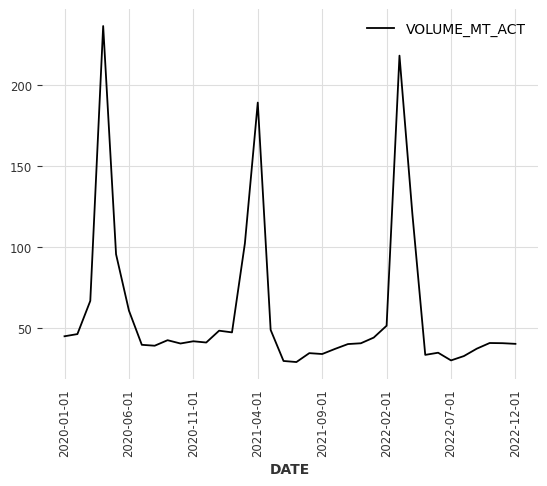

In [2238]:
df_vol_final_test.plot()
plt.xticks(rotation= 'vertical')
plt.show()

In [2239]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller


def adf_test(data):

    result = adfuller(data)
    print(result)
    adf_statistic, p_value, used_lag, nobs, critical_values, icbest = result


    print(f'ADF Statistic: {adf_statistic}')
    print(f'p-value: {p_value}')
    print(f'Lags Used: {used_lag}')
    print(f'Number of Observations: {nobs}')
    print('Critical Values:')
    for key, value in critical_values.items():
        print(f'   {key}: {value}')

    if p_value < 0.05:
        print('The time series is likely stationary.')
    else:
        print('The time series is likely not stationary.')

In [2240]:
adf_test(df_vol_final_test['VOLUME_MT_ACT'])

(-5.795597874377973, 4.7602283087115395e-07, 9, 26, {'1%': -3.7112123008648155, '5%': -2.981246804733728, '10%': -2.6300945562130176}, 253.69755487514723)
ADF Statistic: -5.795597874377973
p-value: 4.7602283087115395e-07
Lags Used: 9
Number of Observations: 26
Critical Values:
   1%: -3.7112123008648155
   5%: -2.981246804733728
   10%: -2.6300945562130176
The time series is likely stationary.


In [2241]:
from pmdarima import auto_arima

model_autoarima = auto_arima(df_vol_final_test['VOLUME_MT_ACT'], seasonal=True, stepwise=True, suppress_warnings=True, max_order=None)

# Get the best orders
p, d, q = model_autoarima.order
print(f'Best ARIMA Order: ({p}, {d}, {q})')

Best ARIMA Order: (0, 0, 1)


In [2242]:
train_new = df_vol_final_test[:-6]
test_new = df_vol_final_test[-6:]

## ---------------------------

## ARIMA

In [2243]:
from statsmodels.tsa.arima.model import ARIMA

model_arima_new = ARIMA(train_new, order=(p, d, q))
results_arima_new = model_arima_new.fit()

# Make forecasts using the fitted ARIMA model
forecast_new = results_arima_new.forecast(steps=6)

In [2244]:
forecast_new

2022-07-01    58.566076
2022-08-01    65.371839
2022-09-01    65.371839
2022-10-01    65.371839
2022-11-01    65.371839
2022-12-01    65.371839
Freq: MS, Name: predicted_mean, dtype: float64

In [2245]:
test_new

,VOLUME_MT_ACT
DATE,
2022-07-01,29.837401
2022-08-01,32.519767
2022-09-01,37.089451
2022-10-01,40.594059
2022-11-01,40.481685
2022-12-01,40.078149


In [2246]:
forecast_new.index= test_new.index

df_arima_new_pred = pd.DataFrame(forecast_new)
df_arima_test_new = pd.DataFrame(test_new)

df_arima_new_data = pd.concat([df_arima_test_new, df_arima_new_pred], axis= 1)
df_arima_new_data

,VOLUME_MT_ACT,predicted_mean
DATE,,
2022-07-01,29.837401,58.566076
2022-08-01,32.519767,65.371839
2022-09-01,37.089451,65.371839
2022-10-01,40.594059,65.371839
2022-11-01,40.481685,65.371839
2022-12-01,40.078149,65.371839


In [2247]:
# metrics_arima

metrics(df_arima_new_data['VOLUME_MT_ACT'], df_arima_new_data['predicted_mean'])

{'MSE': 762.9529718815838,
 'RMSE': 27.621603354649487,
 'MAPE': 76.53239066487495}

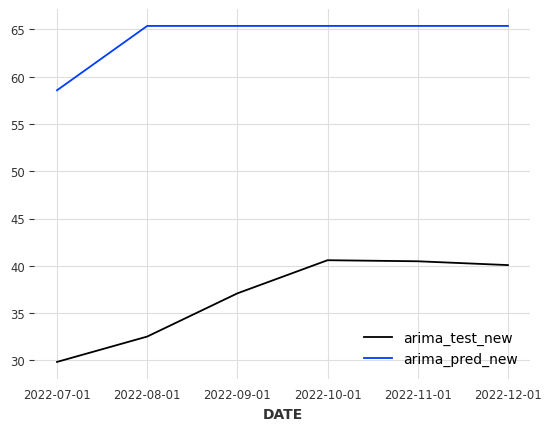

In [2248]:
df_arima_new_data['VOLUME_MT_ACT'].plot(label= 'arima_test_new')
df_arima_new_data['predicted_mean'].plot(label= 'arima_pred_new')
plt.legend()

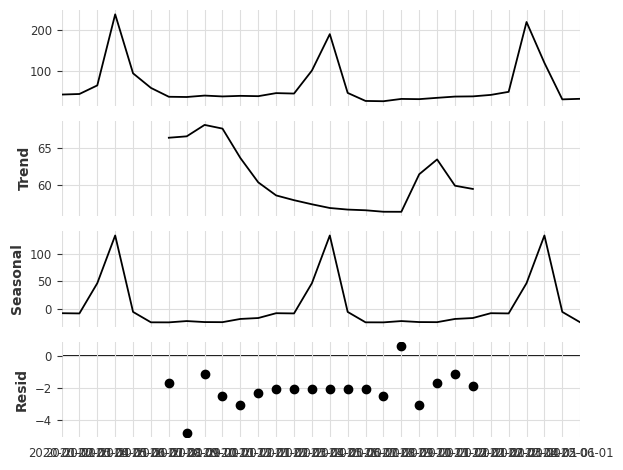

In [2249]:
from statsmodels.tsa.seasonal import seasonal_decompose

seasonal_decompose(train_new, model= 'additive', period=12).plot();

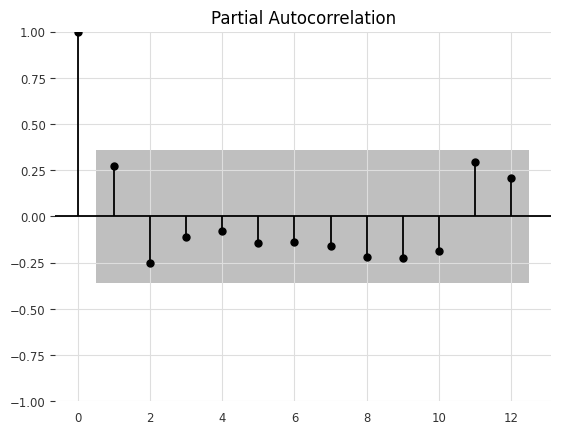

In [2250]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_pacf(train_new, lags= 12);

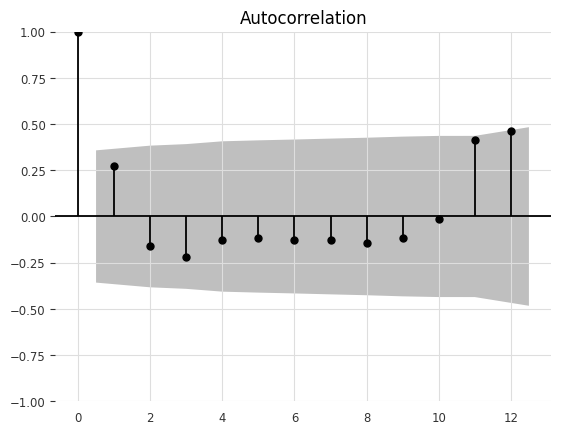

In [2251]:
plot_acf(train_new, lags= 12);

## SARIMAX

In [2252]:
model_sarima = sm.tsa.SARIMAX(train_new, order=(p, d, q), seasonal_order=(p, d, q, 12), random_state= 90)
results_sarima = model_sarima.fit()

# Step 7: Model evaluation
forecast_sarima = results_sarima.get_forecast(steps=6)
forecast_mean = forecast_sarima.predicted_mean
forecast_ci = forecast_sarima.conf_int()

In [2253]:
forecast_mean.index= test_new.index

forecast_mean= pd.DataFrame(forecast_mean)
test_new= pd.DataFrame(test_new)

df_sarimax = pd.concat([test_new, forecast_mean], axis= 1)
df_sarimax

,VOLUME_MT_ACT,predicted_mean
DATE,,
2022-07-01,29.837401,13.495988
2022-08-01,32.519767,9.911344
2022-09-01,37.089451,8.413025
2022-10-01,40.594059,11.209694
2022-11-01,40.481685,12.735863
2022-12-01,40.078149,14.871408


In [2254]:
# metrics_sarimax

metrics(df_sarimax['VOLUME_MT_ACT'], df_sarimax['predicted_mean'])

{'MSE': 644.8618692957741,
 'RMSE': 25.39413060720477,
 'MAPE': 67.57104808599811}

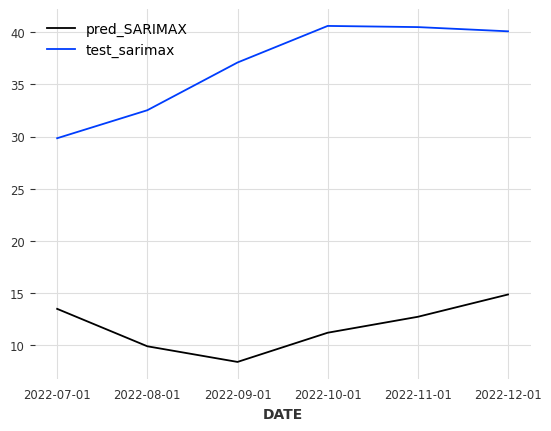

In [2255]:
df_sarimax['predicted_mean'].plot(label= 'pred_SARIMAX');
df_sarimax['VOLUME_MT_ACT'].plot(label= 'test_sarimax');
plt.legend();

## Holt Winter's

In [2256]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model_holt_new = ExponentialSmoothing(train_new, trend= 'mul', seasonal= 'mul').fit()

In [2257]:
test_holt_new = model_holt_new.forecast(6)
test_holt_new, test_new

(2022-07-01    31.214858
 2022-08-01    33.380550
 2022-09-01    34.728099
 2022-10-01    35.195660
 2022-11-01    37.146426
 2022-12-01    36.994189
 Freq: MS, dtype: float64,
             VOLUME_MT_ACT
 DATE                     
 2022-07-01      29.837401
 2022-08-01      32.519767
 2022-09-01      37.089451
 2022-10-01      40.594059
 2022-11-01      40.481685
 2022-12-01      40.078149)

In [2258]:
test_new.columns

Index(['VOLUME_MT_ACT'], dtype='object')

In [2259]:
test_holt_new = pd.DataFrame(test_holt_new)
test_holt_new.rename(columns= {0: 'pred_holt_new'}, inplace= True)
test_holt_new

,pred_holt_new
2022-07-01,31.214858
2022-08-01,33.380550
2022-09-01,34.728099
2022-10-01,35.195660
2022-11-01,37.146426
2022-12-01,36.994189


In [2260]:
# test_holt_new.index = test_new.index
df_holt_new_pred = pd.DataFrame(test_holt_new)
df_test_holt_new = pd.DataFrame(test_new)

df_holt_new_pred.index= df_test_holt_new.index
df_holt_new=  pd.concat([df_holt_new_pred, df_test_holt_new], axis= 1)
df_holt_new

,pred_holt_new,VOLUME_MT_ACT
DATE,,
2022-07-01,31.214858,29.837401
2022-08-01,33.380550,32.519767
2022-09-01,34.728099,37.089451
2022-10-01,35.195660,40.594059
2022-11-01,37.146426,40.481685
2022-12-01,36.994189,40.078149


In [2261]:
# metrics_holt

metrics(df_holt_new['VOLUME_MT_ACT'], df_holt_new['pred_holt_new'])

{'MSE': 9.665297752417322,
 'RMSE': 3.1089061987164106,
 'MAPE': 7.143738551041221}

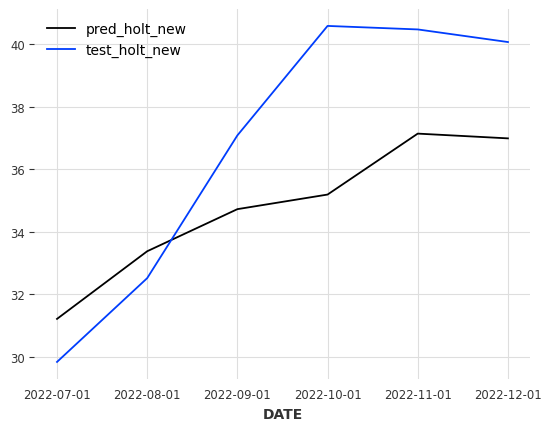

In [2262]:
# train_new.plot(label= 'train_new_data')
df_holt_new['pred_holt_new'].plot(label= 'pred_holt_new')
df_holt_new['VOLUME_MT_ACT'].plot(label= 'test_holt_new')
plt.legend()

## N-BEATS

In [2263]:
import darts
from darts import TimeSeries
from darts.models import NBEATSModel
from darts.dataprocessing.transformers import Scaler, MissingValuesFiller
from darts.metrics import mape as mape_darts
from darts.metrics import r2_score as r2_score_darts
from darts.datasets import AirPassengersDataset

In [2264]:
df_nbeats = df_vol_final_test.copy()

# data_nbeats_new = pd.DataFrame(data_nbeats_new)
data_nbeats_new = df_nbeats.reset_index()

# Create a TimeSeries, specifying the time and value columns
series_new = TimeSeries.from_dataframe(data_nbeats_new, 'DATE', 'VOLUME_MT_ACT')
series_new

<TimeSeries (DataArray) (DATE: 36, component: 1, sample: 1)>
array([[[ 44.76268877]],

       [[ 46.11594037]],

       [[ 66.65141367]],

       [[236.64136179]],

       [[ 95.51311365]],

       [[ 60.64874794]],

       [[ 39.47890237]],

       [[ 38.92571493]],

       [[ 42.331175  ]],

       [[ 40.29096577]],

...

       [[218.32939183]],

       [[120.54      ]],

       [[ 33.25804331]],

       [[ 34.58674454]],

       [[ 29.83740094]],

       [[ 32.51976723]],

       [[ 37.08945089]],

       [[ 40.59405857]],

       [[ 40.48168529]],

       [[ 40.0781489 ]]])
Coordinates:
  * DATE       (DATE) datetime64[ns] 2020-01-01 2020-02-01 ... 2022-12-01
  * component  (component) object 'VOLUME_MT_ACT'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [2321]:
data_nbeats_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DATE           36 non-null     object 
 1   VOLUME_MT_ACT  36 non-null     float64
dtypes: float64(1), object(1)
memory usage: 708.0+ bytes


In [2265]:
df_nbeats

,VOLUME_MT_ACT
DATE,
2020-01-01,44.762689
2020-02-01,46.115940
2020-03-01,66.651414
2020-04-01,236.641362
2020-05-01,95.513114
2020-06-01,60.648748
2020-07-01,39.478902
2020-08-01,38.925715
2020-09-01,42.331175


In [2266]:
# df_nbeats.to_csv('nbeats_vol_id9_train.csv')

In [2267]:
print(len(series_new))
train_nbeats_new, val_nbeats_new = series_new.split_after(pd.Timestamp("20220601"))
print(len(train_nbeats_new))
print(len(val_nbeats_new))

36
30
6


In [2295]:
model_nbeats_new = NBEATSModel(
    input_chunk_length= 16,
    output_chunk_length=2,
    generic_architecture=True,
    num_stacks=5,
    num_blocks=5,
    num_layers=5,
    layer_widths= 150,
    n_epochs= 50,
    batch_size= 2,
    model_name="nbeats_run",
    random_state= 90
)

results_nbeats_new= model_nbeats_new.fit(series= train_nbeats_new)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs



  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 2.4 M 
---------------------------------------------------
2.4 M     Trainable params
851       Non-trainable params
2.4 M     Total params
9.477     Total estimated model params size (MB)


Epoch 49: 100%|██████████| 7/7 [00:00<00:00,  9.81it/s, train_loss=0.00213]

`Trainer.fit` stopped: `max_epochs=50` reached.


Epoch 49: 100%|██████████| 7/7 [00:00<00:00,  9.79it/s, train_loss=0.00213]


In [2296]:
# ID16

# model_nbeats_new = NBEATSModel(
# input_chunk_length= 16,
#     output_chunk_length=2,
#     generic_architecture=True,
#     num_stacks=5,
#     num_blocks=5,
#     num_layers=5,
#     layer_widths= 150,
#     n_epochs= 50,
#     batch_size= 2,
#     model_name="nbeats_run",
#     random_state= 90 --> 5.12
# )

In [2297]:
# ID9

# model_nbeats_new = NBEATSModel(
#     input_chunk_length= 16,
#     output_chunk_length=2,
#     generic_architecture=True,
#     num_stacks=5,
#     num_blocks=5,
#     num_layers=6,
#     layer_widths= 128,
#     n_epochs= 50,
#     batch_size=2,
#     model_name="nbeats_run",
#     random_state= 98 ---> 7.06
# )

In [2298]:
ts_tpred_new = results_nbeats_new.predict(n= 6,  
	                        # past_covariates=cov_t,
	                        num_samples= 1,   
	                        n_jobs= -1, 
	                        verbose=True)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]

Predicting DataLoader 0: 100%|██████████| 1/1 [00:01<00:00,  1.76s/it]


In [2299]:
ts_tpred_new.pd_dataframe(), val_nbeats_new.pd_dataframe()

(component   VOLUME_MT_ACT
 DATE                     
 2022-07-01      30.971318
 2022-08-01      32.322175
 2022-09-01      38.095702
 2022-10-01      40.163694
 2022-11-01      44.032585
 2022-12-01      45.601425,
 component   VOLUME_MT_ACT
 DATE                     
 2022-07-01      29.837401
 2022-08-01      32.519767
 2022-09-01      37.089451
 2022-10-01      40.594059
 2022-11-01      40.481685
 2022-12-01      40.078149)

In [2300]:
nbeats_pred_new = pd.DataFrame(ts_tpred_new.pd_dataframe())
nbeats_pred_new.rename(columns= {'VOLUME_MT_ACT': 'nbeats_pred_new'}, inplace= True)

In [2301]:
df_nbeats_new = pd.concat([val_nbeats_new.pd_dataframe(), nbeats_pred_new], axis=1)
df_nbeats_new

component,VOLUME_MT_ACT,nbeats_pred_new
DATE,,
2022-07-01,29.837401,30.971318
2022-08-01,32.519767,32.322175
2022-09-01,37.089451,38.095702
2022-10-01,40.594059,40.163694
2022-11-01,40.481685,44.032585
2022-12-01,40.078149,45.601425


In [2302]:
df_nbeats_new.index

DatetimeIndex(['2022-07-01', '2022-08-01', '2022-09-01', '2022-10-01',
               '2022-11-01', '2022-12-01'],
              dtype='datetime64[ns]', name='DATE', freq='MS')

In [2310]:
# df_nbeats_new.to_csv('nbeats_vol_id16_pred.csv')

In [2304]:
train_nbeats_new.pd_dataframe()

component,VOLUME_MT_ACT
DATE,
2020-01-01,44.762689
2020-02-01,46.115940
2020-03-01,66.651414
2020-04-01,236.641362
2020-05-01,95.513114
2020-06-01,60.648748
2020-07-01,39.478902
2020-08-01,38.925715
2020-09-01,42.331175


In [2309]:
# df_nbeats.to_csv('nbeats_vol_id16_train.csv')

In [2306]:
df_nbeats_new

component,VOLUME_MT_ACT,nbeats_pred_new
DATE,,
2022-07-01,29.837401,30.971318
2022-08-01,32.519767,32.322175
2022-09-01,37.089451,38.095702
2022-10-01,40.594059,40.163694
2022-11-01,40.481685,44.032585
2022-12-01,40.078149,45.601425


In [2307]:
# metrics_nbeats

metrics(df_nbeats_new['VOLUME_MT_ACT'], df_nbeats_new['nbeats_pred_new'])

{'MSE': 7.606338662846021, 'RMSE': 2.757959148146691, 'MAPE': 5.12233595509895}

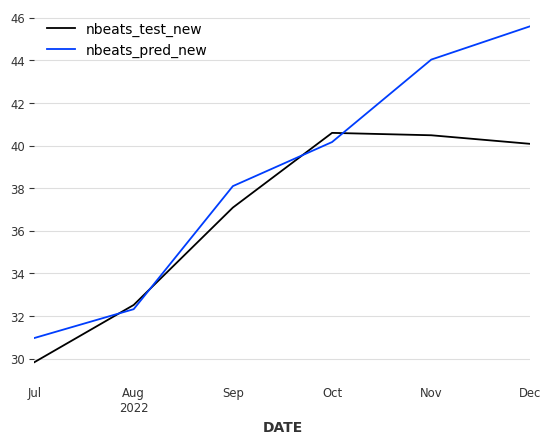

In [2308]:
df_nbeats_new['VOLUME_MT_ACT'].plot(label= 'nbeats_test_new')
df_nbeats_new['nbeats_pred_new'].plot(label= 'nbeats_pred_new')
# pd.DataFrame(train_nbeats_new.pd_dataframe()).plot(label= 'train_data_new')
plt.legend()

## Random forest

In [2198]:
df_rf = df_vol_final_test.copy()
df_rf.head()


# Differencing the time series

df_rf['lag_1'] = df_rf['VOLUME_MT_ACT'].shift(1)
df_rf['lag_2'] = df_rf['VOLUME_MT_ACT'].shift(2)
df_rf['lag_3'] = df_rf['VOLUME_MT_ACT'].shift(3)
# df_rf['lag_4'] = df_rf['VOLUME_MT_ACT'].shift(4)
# df_rf['lag_5'] = df_rf['VOLUME_MT_ACT'].shift(5)
# df_rf['lag_6'] = df_rf['VOLUME_MT_ACT'].shift(6)
# df_rf['lag_7'] = df_rf['VOLUME_MT_ACT'].shift(7)
# df_rf['lag_8'] = df_rf['VOLUME_MT_ACT'].shift(8)
# df_rf['lag_9'] = df_rf['VOLUME_MT_ACT'].shift(9)
# df_rf['lag_10'] = df_rf['VOLUME_MT_ACT'].shift(10)
# df_rf['lag_11'] = df_rf['VOLUME_MT_ACT'].shift(11)
# df_rf['lag_12'] = df_rf['VOLUME_MT_ACT'].shift(12)
# df_rf['lag_13'] = df_rf['VOLUME_MT_ACT'].shift(13)

print(len(df_rf))

36


In [2199]:
# 'lag_6', 'lag_7', 'lag_8', 'lag_9', 'lag_10', 'lag_11', 'lag_12', 'lag_13'

df_rf = df_rf.dropna()

df_rf = df_rf[['VOLUME_MT_ACT', 'lag_1', 'lag_2', 'lag_3'
                       ]]

df_rf, len(df_rf)

(            VOLUME_MT_ACT      lag_1      lag_2      lag_3
 DATE                                                      
 2020-04-01       5.202650  11.487000  12.408500  29.702200
 2020-05-01       5.806350   5.202650  11.487000  12.408500
 2020-06-01      26.245750   5.806350   5.202650  11.487000
 2020-07-01      31.496500  26.245750   5.806350   5.202650
 2020-08-01      25.377800  31.496500  26.245750   5.806350
 2020-09-01      25.171400  25.377800  31.496500  26.245750
 2020-10-01      26.261000  25.171400  25.377800  31.496500
 2020-11-01      29.169600  26.261000  25.171400  25.377800
 2020-12-01      30.271100  29.169600  26.261000  25.171400
 2021-01-01      28.686400  30.271100  29.169600  26.261000
 2021-02-01      24.533450  28.686400  30.271100  29.169600
 2021-03-01      26.930200  24.533450  28.686400  30.271100
 2021-04-01      19.219500  26.930200  24.533450  28.686400
 2021-05-01      28.875049  19.219500  26.930200  24.533450
 2021-06-01      31.137899  28.875049  1

In [2200]:
X = df_rf.drop(columns= ['VOLUME_MT_ACT'], axis=1)
y = df_rf['VOLUME_MT_ACT']

X_train_rf, X_test_rf, y_train_rf, y_test_rf = X[:-6], X[-6:], y[:-6], y[-6:]

In [2225]:
from sklearn.ensemble import RandomForestRegressor

model_rf= RandomForestRegressor(random_state= 100)

model_rf.fit(X_train_rf, y_train_rf)
pred_rf = model_rf.predict(X_test_rf)
pred_rf

array([30.83841104, 34.89802812, 35.57329751, 34.8006439 , 32.82669309,
       34.14302408])

In [2226]:
pred_rf = pd.DataFrame(pred_rf, index= y_test_rf.index)
df_rf = pd.concat([y_test_rf, pred_rf], axis=1)

df_rf.columns = ['actual', 'prediction']
df_rf

,actual,prediction
DATE,,
2022-07-01,37.059700,30.838411
2022-08-01,39.011809,34.898028
2022-09-01,32.616830,35.573298
2022-10-01,34.390350,34.800644
2022-11-01,31.527350,32.826693
2022-12-01,32.354250,34.143024


In [2227]:
# metrics_rf

metrics(df_rf['actual'], df_rf['prediction'])

{'MSE': 11.570778830548369,
 'RMSE': 3.401584752809838,
 'MAPE': 7.873248911394613}

Text(0.5, 1.0, 'Random Forest')

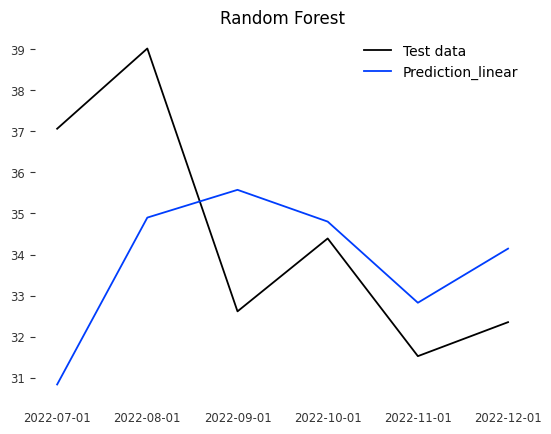

In [2228]:
plt.plot(df_rf['actual'], label = 'Test data')
plt.plot(df_rf['prediction'], label = 'Prediction_linear')
plt.legend()
plt.grid()
plt.title('Random Forest')